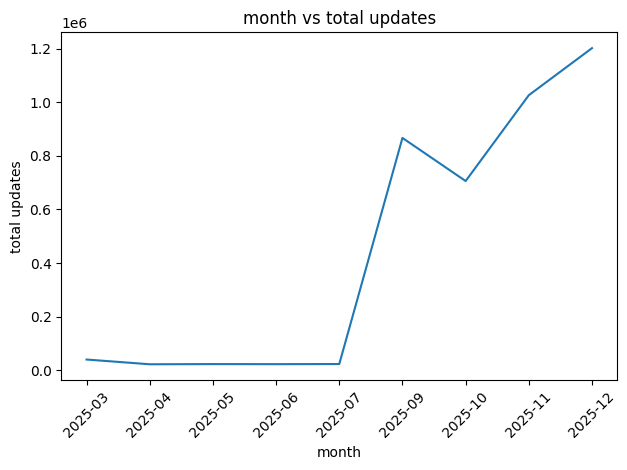

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

demographic_df=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
biometric_df=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")

combined=pd.concat([demographic_df,biometric_df])
combined["month"]=pd.to_datetime(combined["date"]).dt.to_period("M").astype(str)

month_updates=(
    combined
    .groupby("month")
    .size()
    .sort_index()
)

plt.figure()
plt.plot(month_updates.index,month_updates.values)
plt.xticks(rotation=45)
plt.xlabel("month")
plt.ylabel("total updates")
plt.title("month vs total updates")
plt.tight_layout()
plt.show()
